## Análisis y Clustering de Canciones
### 1. Importación de bibliotecas y carga de datos

- Se cargan los datos de canciones, playlists y la relación entre ambas. Se ajusta la columna explícito para asegurar que sea numérica.

In [3]:
%%time

import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Eliminamos warnings innecesarios
import warnings
warnings.filterwarnings('ignore')

# Carga de los datos
df_canciones = pd.read_csv("canciones_total.csv")
df_playlists = pd.read_csv("playlists1.csv")
df_tracks = pd.read_csv("tracks_playlists.csv")

# Conversión del campo 'explícito' a entero
df_canciones['explícito'] = df_canciones['explícito'].astype(int)

CPU times: total: 531 ms
Wall time: 797 ms


In [4]:
df_canciones.head()

,canción id,nombre,artistas,duración (segundos),popularidad,explícito,fecha de lanzamiento,url de spotify,imagen,danceability,energy,valence,tempo,acousticness,instrumentalness,speechiness,clave (key),modo (mode),predicted_genre
0,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"Lady Gaga, Bruno Mars",251.667,100,0,2024-08-16,https://open.spotify.com/track/2plbrEY59IikOBg...,https://i.scdn.co/image/ab67616d0000b27382ea2e...,0.521,0.592,0.535,157.969,0.30800,0.000000,0.0304,6,0,country
1,5vNRhkKd0yEAg8suGBpjeY,APT.,"ROSÉ, Bruno Mars",169.917,97,0,2024-10-18,https://open.spotify.com/track/5vNRhkKd0yEAg8s...,https://i.scdn.co/image/ab67616d0000b273f8c829...,0.777,0.783,0.939,149.027,0.02830,0.000000,0.2600,0,0,rock
2,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,210.373,97,0,2024-05-17,https://open.spotify.com/track/6dOtVTDdiauQNBQ...,https://i.scdn.co/image/ab67616d0000b27371d62e...,0.747,0.507,0.438,104.978,0.20000,0.060800,0.0358,2,1,hip hop
3,7tI8dRuH2Yc6RuoTjxo4dU,Who,Jimin,170.887,92,0,2024-07-19,https://open.spotify.com/track/7tI8dRuH2Yc6Ruo...,https://i.scdn.co/image/ab67616d0000b273f02c45...,0.660,0.756,0.838,116.034,0.00289,0.000000,0.0320,0,0,latin
4,1cOboCuWYI2osTOfolMRS6,Tu Boda,"Oscar Maydon, Fuerza Regida",225.880,92,1,2024-09-26,https://open.spotify.com/track/1cOboCuWYI2osTO...,https://i.scdn.co/image/ab67616d0000b273b51d9a...,0.694,0.651,0.471,112.648,0.49600,0.000014,0.0784,6,1,country


In [5]:
df_playlists.head()

,Playlist ID,Nombre Playlist,Descripción,Número de canciones,Url de Spotify
0,37i9dQZEVXbMDoHDwVN2tF,Top 50 - Global,Your daily update of the most played tracks ri...,50,https://open.spotify.com/playlist/37i9dQZEVXbM...
1,37i9dQZF1DXcBWIGoYBM5M,Today’s Top Hits,The hottest 50. Cover: Lady Gaga,50,https://open.spotify.com/playlist/37i9dQZF1DXc...
2,37i9dQZEVXbLRQDuF5jeBp,Top 50 - USA,Your daily update of the most played tracks ri...,50,https://open.spotify.com/playlist/37i9dQZEVXbL...
3,37i9dQZF1DX1lVhptIYRda,Hot Country,Today's top country hits. Cover: Cody Johnson,50,https://open.spotify.com/playlist/37i9dQZF1DX1...
4,37i9dQZF1Fa1IIVtEpGUcU,Your Top Songs 2023,Spotify Wrapped presents the songs you loved t...,0,https://open.spotify.com/playlist/37i9dQZF1Fa1...


In [6]:
df_tracks.head()

,Canción ID,Playlist ID
0,2plbrEY59IikOBgBGLjaoe,37i9dQZEVXbMDoHDwVN2tF
1,5vNRhkKd0yEAg8suGBpjeY,37i9dQZEVXbMDoHDwVN2tF
2,6dOtVTDdiauQNBQEDOtlAB,37i9dQZEVXbMDoHDwVN2tF
3,7tI8dRuH2Yc6RuoTjxo4dU,37i9dQZEVXbMDoHDwVN2tF
4,1cOboCuWYI2osTOfolMRS6,37i9dQZEVXbMDoHDwVN2tF


### 2. Selección y escalado de características

- Se escalan las características seleccionadas para estandarizar su rango. El escalador se guarda para su reutilización.

In [8]:
%%time

# Selección de características numéricas relevantes
features = ['duración (segundos)', 'popularidad', 'danceability', 'energy', 'valence', 
            'tempo', 'acousticness', 'instrumentalness', 'speechiness', "explícito", "clave (key)", "modo (mode)"]

# Escalado de datos
scaler = StandardScaler()
df_canciones_scaled = scaler.fit_transform(df_canciones[features])
df_canciones_scaled = pd.DataFrame(df_canciones_scaled, columns = features)

# Primeros registros escalados
print(df_canciones_scaled.head())
print('')

# Guardar el escalador
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Escalador guardado en el archivo 'scaler.pkl'.")
print('')

   duración (segundos)  popularidad  danceability    energy   valence  \
0             0.397521     2.627780     -0.637211 -0.246872  0.041103   
1            -0.693106     2.497114      0.988932  0.640039  1.666788   
2            -0.153383     2.497114      0.798368 -0.641570 -0.349223   
3            -0.680165     2.279337      0.245734  0.514664  1.260367   
4             0.053496     2.279337      0.461706  0.027095 -0.216432   

      tempo  acousticness  instrumentalness  speechiness  explícito  \
0  1.271821      0.085220         -0.349187    -0.549471  -0.416303   
1  0.956469     -0.863480         -0.349187     1.536025  -0.416303   
2 -0.596982     -0.281100         -0.081295    -0.500422  -0.416303   
3 -0.207076     -0.949667         -0.349187    -0.534938  -0.416303   
4 -0.326489      0.722888         -0.349127    -0.113479   2.402097   

   clave (key)  modo (mode)  
0     0.192355    -1.298016  
1    -1.484561    -1.298016  
2    -0.925589     0.770406  
3    -1.484561

### 3. Clustering de canciones en una playlist específica

- Se filtran las canciones de una playlist y se agrupan en clusters usando K-Means.

In [10]:
%%time

# Filtrar canciones de una playlist específica
playlist_id = '37i9dQZEVXbMDoHDwVN2tF'
df_playlist_canciones = df_tracks[df_tracks['Playlist ID'] == playlist_id]
canciones_playlist = df_canciones[df_canciones['canción id'].isin(df_playlist_canciones['Canción ID'])]

# Verificamos cuántas canciones tiene la playlist
print(f"Número de canciones en la playlist {playlist_id}: {len(df_playlist_canciones)}")
print('')

# Realizar clustering
X = df_canciones_scaled.loc[canciones_playlist.index, features]
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(X)

# Asignar clusters
canciones_playlist['Cluster'] = kmeans.labels_

# Verificamos las canciones filtradas
print("Primeras canciones de la playlist filtrada:", canciones_playlist.head())
print('')

Número de canciones en la playlist 37i9dQZEVXbMDoHDwVN2tF: 100

Primeras canciones de la playlist filtrada:                canción id              nombre                     artistas  \
0  2plbrEY59IikOBgBGLjaoe    Die With A Smile        Lady Gaga, Bruno Mars   
1  5vNRhkKd0yEAg8suGBpjeY                APT.             ROSÉ, Bruno Mars   
2  6dOtVTDdiauQNBQEDOtlAB  BIRDS OF A FEATHER                Billie Eilish   
3  7tI8dRuH2Yc6RuoTjxo4dU                 Who                        Jimin   
4  1cOboCuWYI2osTOfolMRS6             Tu Boda  Oscar Maydon, Fuerza Regida   

   duración (segundos)  popularidad  explícito fecha de lanzamiento  \
0              251.667          100          0           2024-08-16   
1              169.917           97          0           2024-10-18   
2              210.373           97          0           2024-05-17   
3              170.887           92          0           2024-07-19   
4              225.880           92          1           2024-09-26 

  File "C:\Users\riesg\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 245, in _count_physical_cores
    raise ValueError(


### 4. Clustering de playlists según características agregadas

- Se calculan las características promedio por playlist, se escalan y se agrupan en clusters.

In [12]:
%%time

# Unir canciones con playlists y calcular promedios por playlist
df_playlist_canciones = pd.merge(df_tracks, df_canciones, left_on = "Canción ID", right_on = "canción id")
df_playlist_stats = df_playlist_canciones.groupby('Playlist ID')[features].mean().reset_index()

# Escalado de datos por playlist
X_playlists_scaled = scaler.fit_transform(df_playlist_stats[features])

# Clustering de playlists
kmeans_playlists = KMeans(n_clusters=4, random_state=42)
kmeans_playlists.fit(X_playlists_scaled)

# Asignar clusters
df_playlist_stats['Cluster'] = kmeans_playlists.labels_

# Verificamos los resultados del clustering
print(canciones_playlist[['nombre', 'Cluster']].head())
print('')

# Contamos composicion de los clusters
canciones_playlist["Cluster"].value_counts()

               nombre  Cluster
0    Die With A Smile        0
1                APT.        3
2  BIRDS OF A FEATHER        0
3                 Who        0
4             Tu Boda        2

CPU times: total: 156 ms
Wall time: 52.4 ms


Cluster
0    26
2    12
1     8
3     6
Name: count, dtype: int64

In [44]:
%%time

# Guardamos nuevo CSV con clusters
canciones_playlist.to_csv('df_cluster_canciones.csv', index = False)

CPU times: total: 0 ns
Wall time: 7.84 ms


### 5. Método del codo para determinar el número óptimo de clusters

- El gráfico ayuda a identificar el número de clusters adecuado al observar dónde disminuye la inercia de forma notable.

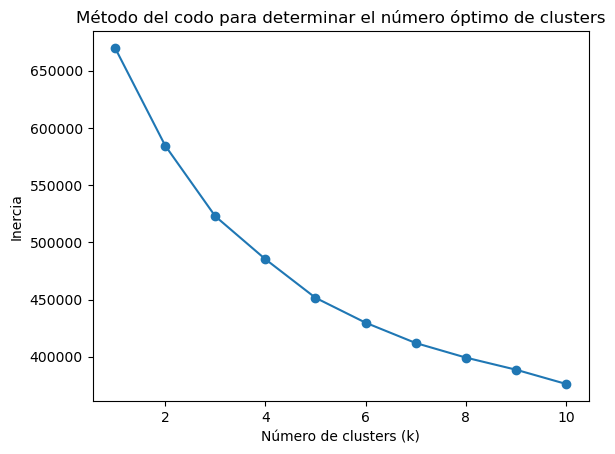

CPU times: total: 7.86 s
Wall time: 529 ms


In [15]:
%%time

# Determinar la inercia para diferentes valores de k
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df_canciones_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(k_values, inertia, marker = 'o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.show()

## Análisis y Clustering de Playlists
### 1. Unión de Canciones y Playlists
- Se combinan los datos de canciones (df_canciones) y playlists (df_tracks) para vincular las canciones con sus respectivas playlists

In [17]:
%%time

df_playlist_canciones = pd.merge(df_tracks, df_canciones, left_on = "Canción ID", right_on = "canción id")

CPU times: total: 15.6 ms
Wall time: 34.9 ms


### 2. Cálculo de Estadísticas por Playlist
- Se agrupan las canciones por Playlist ID y se calculan las medias de las características numéricas seleccionadas

In [19]:
%%time

playlist_features = ['duración (segundos)', 'popularidad', 'danceability', 'energy', 'valence', 
                     'tempo', 'acousticness', 'instrumentalness', 'speechiness', "explícito", 
                     "clave (key)", "modo (mode)"]

df_playlist_stats = df_playlist_canciones.groupby('Playlist ID')[playlist_features].mean().reset_index()

df_playlist_stats

CPU times: total: 0 ns
Wall time: 14 ms


,Playlist ID,duración (segundos),popularidad,danceability,energy,valence,tempo,acousticness,instrumentalness,speechiness,explícito,clave (key),modo (mode)
0,004I1hU0IiZUeNrAlLrLJ9,210.727000,2.500000,0.532853,0.761500,0.525912,142.575853,0.165613,0.000082,0.044271,0.029412,5.705882,0.647059
1,00KjsgI9t715OJFEUFziGJ,268.873193,56.963855,0.614590,0.604398,0.664614,120.430096,0.262501,0.026793,0.040014,0.000000,4.590361,0.783133
2,00L9Fq1fvpmCk6pjEkh1vZ,178.476450,49.816667,0.790517,0.653383,0.458758,129.335300,0.087908,0.000577,0.221322,0.983333,4.683333,0.550000
3,00cyNwgfSwmnX4o7zvXIxm,225.944576,50.555556,0.676505,0.794556,0.283861,121.201818,0.099187,0.357913,0.045618,0.020202,6.050505,0.242424
4,00lcDNEw2Ych9srALHrMEr,184.634950,64.030000,0.748480,0.731120,0.700870,120.623770,0.248551,0.003973,0.077337,0.150000,5.140000,0.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,7xfHMGOBCRP1WZzl5Gfqpv,189.414143,19.010204,0.566163,0.390413,0.573279,121.655490,0.645349,0.025951,0.049737,0.000000,5.163265,0.877551
1147,7y4XRBNSK1DpMyvaUnFBxe,184.152704,18.112245,0.537112,0.623953,0.335226,129.463378,0.263986,0.708434,0.080859,0.112245,6.091837,0.632653
1148,7yWU38IY8sHGodYEiiaqvx,209.629273,46.787879,0.691000,0.714364,0.555855,135.899909,0.290418,0.071726,0.121542,0.242424,4.818182,0.393939
1149,7zX7rnwTAZWRjPkSuxnYye,178.229940,53.460000,0.652130,0.717820,0.545184,124.786340,0.145463,0.021792,0.065755,0.000000,5.530000,0.570000


### 3. Escalado de Datos
- Se utiliza el mismo escalador previamente guardado (scaler.pkl) para normalizar las características de las playlists

In [21]:
%%time

X_playlists_scaled = scaler.fit_transform(df_playlist_stats[playlist_features])

X_playlists_scaled

CPU times: total: 0 ns
Wall time: 2.09 ms


array([[-0.17606906, -2.72908886, -1.09713754, ..., -0.60512932,
         0.76354206,  0.15475236],
       [ 1.16578433,  0.44486019, -0.2047056 , ..., -0.7290669 ,
        -1.39458654,  0.94687185],
       [-0.9203226 ,  0.02834886,  1.71610682, ...,  3.41457959,
        -1.21471964, -0.41025162],
       ...,
       [-0.20140157, -0.14815753,  0.62955612, ...,  0.29247923,
        -0.9538367 , -1.31871991],
       [-0.92601137,  0.24066865,  0.20516263, ..., -0.7290669 ,
         0.42327346, -0.29382656],
       [ 0.76533169,  0.63345055, -0.2538418 , ..., -0.68692812,
         0.32654158,  0.28829876]])

### 4. Clustering de Playlists
- Se agrupan las playlists en 4 clusters utilizando KMeans

In [23]:
%%time

kmeans_playlists = KMeans(n_clusters = 4, random_state = 42)
kmeans_playlists.fit(X_playlists_scaled)

df_playlist_stats['Cluster'] = kmeans_playlists.labels_

df_playlist_stats

CPU times: total: 0 ns
Wall time: 6.99 ms


,Playlist ID,duración (segundos),popularidad,danceability,energy,valence,tempo,acousticness,instrumentalness,speechiness,explícito,clave (key),modo (mode),Cluster
0,004I1hU0IiZUeNrAlLrLJ9,210.727000,2.500000,0.532853,0.761500,0.525912,142.575853,0.165613,0.000082,0.044271,0.029412,5.705882,0.647059,0
1,00KjsgI9t715OJFEUFziGJ,268.873193,56.963855,0.614590,0.604398,0.664614,120.430096,0.262501,0.026793,0.040014,0.000000,4.590361,0.783133,1
2,00L9Fq1fvpmCk6pjEkh1vZ,178.476450,49.816667,0.790517,0.653383,0.458758,129.335300,0.087908,0.000577,0.221322,0.983333,4.683333,0.550000,2
3,00cyNwgfSwmnX4o7zvXIxm,225.944576,50.555556,0.676505,0.794556,0.283861,121.201818,0.099187,0.357913,0.045618,0.020202,6.050505,0.242424,0
4,00lcDNEw2Ych9srALHrMEr,184.634950,64.030000,0.748480,0.731120,0.700870,120.623770,0.248551,0.003973,0.077337,0.150000,5.140000,0.550000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,7xfHMGOBCRP1WZzl5Gfqpv,189.414143,19.010204,0.566163,0.390413,0.573279,121.655490,0.645349,0.025951,0.049737,0.000000,5.163265,0.877551,3
1147,7y4XRBNSK1DpMyvaUnFBxe,184.152704,18.112245,0.537112,0.623953,0.335226,129.463378,0.263986,0.708434,0.080859,0.112245,6.091837,0.632653,0
1148,7yWU38IY8sHGodYEiiaqvx,209.629273,46.787879,0.691000,0.714364,0.555855,135.899909,0.290418,0.071726,0.121542,0.242424,4.818182,0.393939,0
1149,7zX7rnwTAZWRjPkSuxnYye,178.229940,53.460000,0.652130,0.717820,0.545184,124.786340,0.145463,0.021792,0.065755,0.000000,5.530000,0.570000,1


In [46]:
%%time

# Guardamos nuevo CSV con clusters
df_playlist_stats.to_csv('df_cluster_playlist.csv', index = False)

CPU times: total: 0 ns
Wall time: 22 ms


### 5. Visualización y validación

In [25]:
%%time

# Visualizamos la distribución de playlists en los clusters
print(df_playlist_stats['Cluster'].value_counts())
print('')

Cluster
1    503
2    372
0    144
3    132
Name: count, dtype: int64

CPU times: total: 0 ns
Wall time: 1e+03 μs


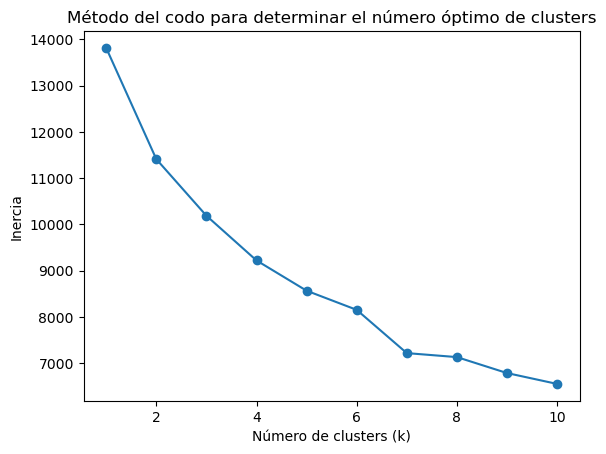

CPU times: total: 2.98 s
Wall time: 307 ms


In [26]:
%%time

# Determinamos el número óptimo de clusters ajustando el modelo con diferentes valores de k

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_playlists_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker = 'o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.show()

In [27]:
### Fin ###